# Ethereum (ETH-USD): Exploratory Data Analysis

In [59]:
# importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode

In [60]:
# storing ETH data in a DataFrame for easy manipulation and analysis
df = pd.read_csv(r'csv/eth_daily_5yr_data.csv')

In [61]:
# displaying the whole DataFrame
df

,DATE,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,MARKET_CAP
0,11/9/2017,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,"$30,685,584,327"
1,11/10/2017,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,"$28,623,188,738"
2,11/11/2017,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,"$30,105,285,828"
3,11/12/2017,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,"$29,463,540,579"
4,11/13/2017,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,"$30,312,834,756"
...,...,...,...,...,...,...,...,...
2123,9/2/2023,1628.559692,1644.030640,1627.976074,1637.025391,1637.025391,2943590996,"$196,796,363,892"
2124,9/3/2023,1637.043579,1645.645142,1626.089233,1636.117676,1636.117676,3151878318,"$196,688,728,216"
2125,9/4/2023,1635.724731,1642.653198,1618.523682,1629.655273,1629.655273,3887968912,"$195,913,396,980"
2126,9/5/2023,1629.911011,1645.948364,1610.141235,1633.629395,1633.629395,4417491902,"$196,391,969,143"


In [62]:
# getting the dimensions of the DataFrame
df.shape

(2128, 8)

In [63]:
# getting only the columns of the DataFrame
df.columns

Index(['DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'ADJUSTED_CLOSE', 'VOLUME',
       'MARKET_CAP'],
      dtype='object')

In [64]:
# information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            2128 non-null   object 
 1   OPEN            2128 non-null   float64
 2   HIGH            2128 non-null   float64
 3   LOW             2128 non-null   float64
 4   CLOSE           2128 non-null   float64
 5   ADJUSTED_CLOSE  2128 non-null   float64
 6   VOLUME          2128 non-null   int64  
 7   MARKET_CAP      2128 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 133.1+ KB


In [65]:
# generating the descriptive statistics of the data
df.describe()

,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME
count,2128.000000,2128.000000,2128.000000,2128.000000,2128.000000,2.128000e+03
mean,1201.758725,1237.256639,1162.002088,1202.174270,1202.174270,1.224026e+10
std,1135.782483,1168.975678,1097.691765,1135.229337,1135.229337,1.034450e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,225.868633,230.016407,218.956932,225.957733,225.957733,4.687060e+09
50%,730.772827,759.938507,695.980499,731.034576,731.034576,9.586319e+09
75%,1840.845063,1871.828034,1804.785065,1840.769287,1840.769287,1.692070e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


In [66]:
# showing only the initial five rows
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,MARKET_CAP
0,11/9/2017,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,"$30,685,584,327"
1,11/10/2017,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,"$28,623,188,738"
2,11/11/2017,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,"$30,105,285,828"
3,11/12/2017,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,"$29,463,540,579"
4,11/13/2017,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,"$30,312,834,756"


the data 'Pre-processing' process

In [67]:
# calculating the percentage change in the 'ADJUSTED_CLOSE' column and storing it in the '%_CHANGE' column
df['%_CHANGE'] = df['ADJUSTED_CLOSE'].pct_change()

In [68]:
# counting the number of duplicated rows
df.duplicated().sum()

0

In [69]:
# counting the number of missing values in each columns
df.isnull().sum()

DATE              0
OPEN              0
HIGH              0
LOW               0
CLOSE             0
ADJUSTED_CLOSE    0
VOLUME            0
MARKET_CAP        0
%_CHANGE          1
dtype: int64

In [70]:
# displaying the first 5 rows of the updated DataFrame
df.head()

,DATE,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,MARKET_CAP,%_CHANGE
0,11/9/2017,308.644989,329.451996,307.056000,320.884003,320.884003,893249984,"$30,685,584,327",NaN
1,11/10/2017,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,"$28,623,188,738",-0.067411
2,11/11/2017,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,"$30,105,285,828",0.051555
3,11/12/2017,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,"$29,463,540,579",-0.021523
4,11/13/2017,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,"$30,312,834,756",0.028606


1. Analyzing the price change of ETH over time.

In [71]:
# converting the 'DATE' column to a datetime data type
df['DATE'] = df['DATE'].astype('datetime64[ns]')

In [72]:
updated_data = df.sort_index(ascending=False).reset_index()
updated_data.drop('index', axis=1, inplace=True)

In [73]:
updated_data

,DATE,OPEN,HIGH,LOW,CLOSE,ADJUSTED_CLOSE,VOLUME,MARKET_CAP,%_CHANGE
0,2023-09-06,1633.912109,1656.932739,1611.147705,1632.252319,1632.252319,4987397046,"$196,226,976,907",-0.000843
1,2023-09-05,1629.911011,1645.948364,1610.141235,1633.629395,1633.629395,4417491902,"$196,391,969,143",0.002439
2,2023-09-04,1635.724731,1642.653198,1618.523682,1629.655273,1629.655273,3887968912,"$195,913,396,980",-0.003950
3,2023-09-03,1637.043579,1645.645142,1626.089233,1636.117676,1636.117676,3151878318,"$196,688,728,216",-0.000554
4,2023-09-02,1628.559692,1644.030640,1627.976074,1637.025391,1637.025391,2943590996,"$196,796,363,892",0.005241
...,...,...,...,...,...,...,...,...,...
2123,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984,"$30,312,834,756",0.028606
2124,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936,"$29,463,540,579",-0.021523
2125,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992,"$30,105,285,828",0.051555
2126,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984,"$28,623,188,738",-0.067411


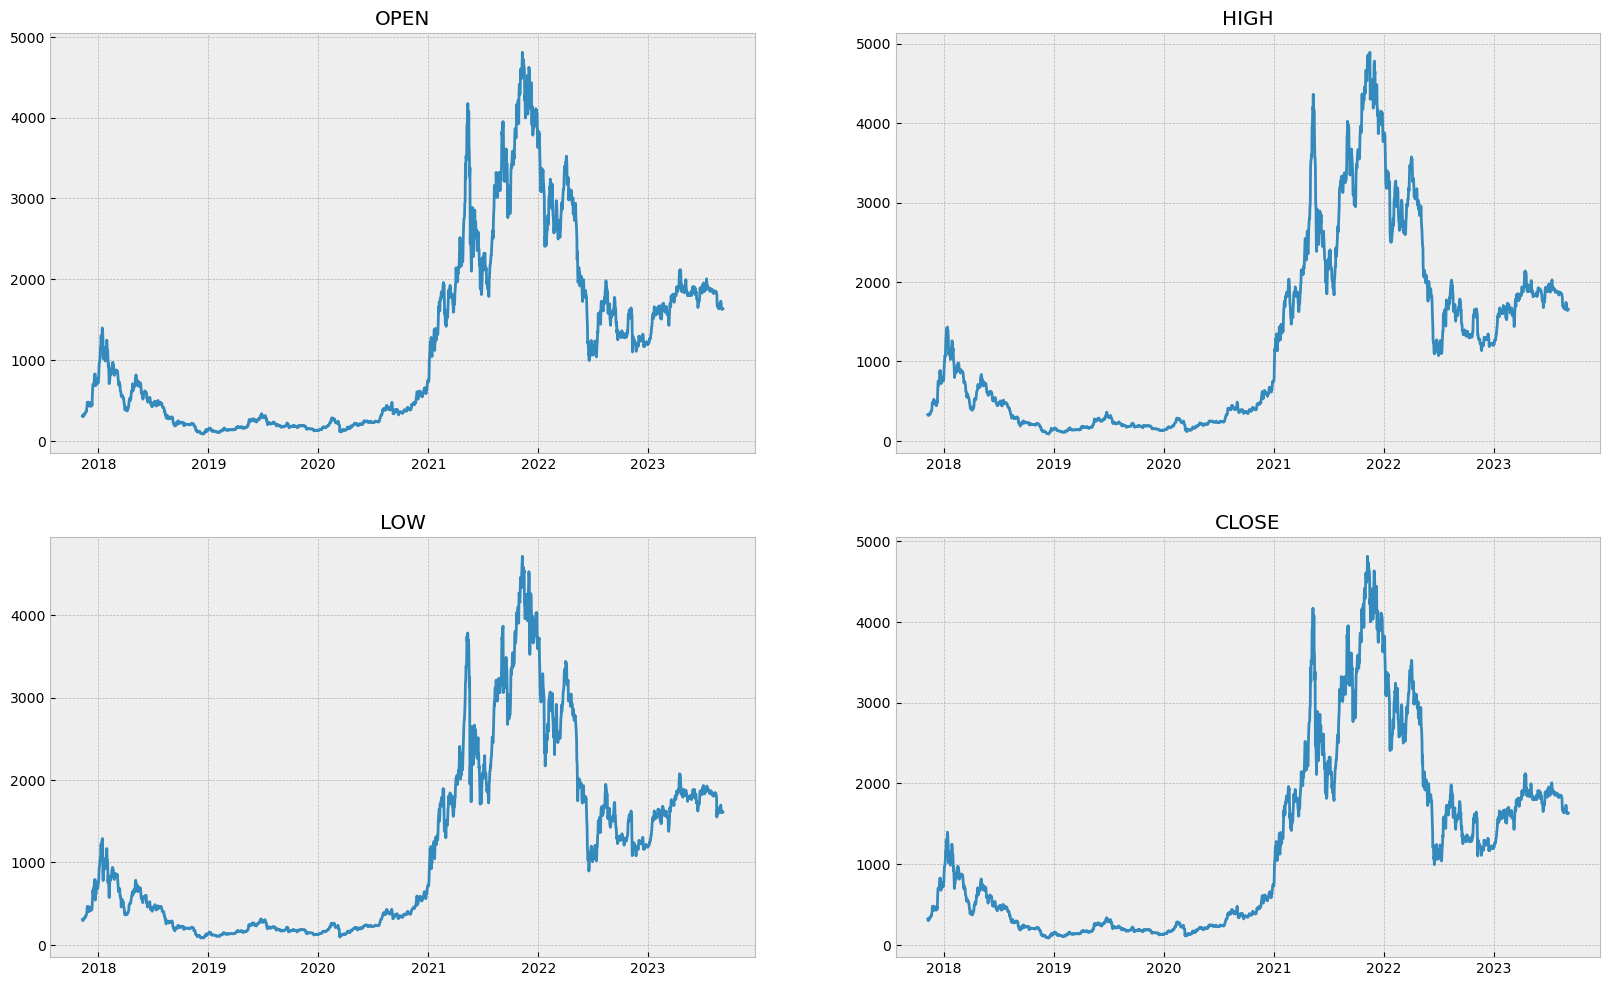

In [74]:
plt.figure(figsize=(20, 12))
plt.style.use('bmh')

for index, col in enumerate(['OPEN', 'HIGH', 'LOW', 'CLOSE'], 1):
    plt.subplot(2, 2, index)
    plt.plot(updated_data['DATE'], updated_data[col])
    plt.title(col)

2. Analyzing the price of ETH over time using a candlestick chart.

In [75]:
# initializing plotly's notebook mode with connectivity enabled
init_notebook_mode(connected=True)

In [76]:
# creating a new candlestick chart
new_plot = go.Candlestick(x=updated_data['DATE'],
                          high=updated_data['HIGH'],
                          open=updated_data['OPEN'],
                          close=updated_data['CLOSE'],
                          low=updated_data['LOW'])

In [77]:
figure = [new_plot]
layout = {
    'title': 'ETH 5yr Historical Price',
    'xaxis': {'title': 'Date'},
    'yaxis': {'title': 'BTC price in USD'}
}
candle_stk_data = go.Figure(data=figure, layout=layout)
candle_stk_data.show()

3. Analysing daily change % in closing price

In [78]:
updated_data['%_CHANGE']

0      -0.000843
1       0.002439
2      -0.003950
3      -0.000554
4       0.005241
          ...   
2123    0.028606
2124   -0.021523
2125    0.051555
2126   -0.067411
2127         NaN
Name: %_CHANGE, Length: 2128, dtype: float64

In [79]:
updated_data['DATE']

0      2023-09-06
1      2023-09-05
2      2023-09-04
3      2023-09-03
4      2023-09-02
          ...    
2123   2017-11-13
2124   2017-11-12
2125   2017-11-11
2126   2017-11-10
2127   2017-11-09
Name: DATE, Length: 2128, dtype: datetime64[ns]

In [80]:
# setting the 'DATE' column as the index for the updated_data DataFrame in place
updated_data.set_index('DATE', inplace=True)

In [81]:
# displaying the chart for daily % change in closing price
data = [go.Scatter(x=updated_data.index,
                   y=updated_data['%_CHANGE'], mode='lines')]
layout = go.Layout(title="Daily % Change in Closing Price",
                   xaxis=dict(title='Date'), yaxis=dict(title='% Change'))
fig = go.Figure(data=data, layout=layout)
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)

END: Closing Price Analysis: Monthly, Quarterly, and Yearly Trends

In [82]:
# monthly mean
updated_data['CLOSE'].resample('M').mean()

DATE
2017-11-30     379.732093
2017-12-31     640.209291
2018-01-31    1103.646004
2018-02-28     873.116318
2018-03-31     625.761325
                 ...     
2023-05-31    1845.626378
2023-06-30    1818.705579
2023-07-31    1893.345290
2023-08-31    1756.978157
2023-09-30    1632.861878
Freq: M, Name: CLOSE, Length: 71, dtype: float64

In [83]:
# monthly mean chart
monthly_close_mean = updated_data.resample('M')['CLOSE'].mean()

# creating a new DataFrame with the resampled data
monthly_data = pd.DataFrame(
    {'Date': monthly_close_mean.index, 'Mean Close': monthly_close_mean.values})

# plotting the data
fig = px.line(monthly_data, x='Date', y='Mean Close', line_shape='linear', labels={
              'Date': 'Date', 'Mean Close': 'Mean Close'})
fig.show()

In [84]:
# quarterly mean
updated_data['CLOSE'].resample('Q').mean()

DATE
2017-12-31     532.086680
2018-03-31     867.320934
2018-06-30     574.633165
2018-09-30     338.810457
2018-12-31     162.600609
2019-03-31     131.030422
2019-06-30     220.182696
2019-09-30     211.642078
2019-12-31     163.539845
2020-03-31     184.195056
2020-06-30     205.440528
2020-09-30     343.038269
2020-12-31     495.047509
2021-03-31    1541.277395
2021-06-30    2597.435252
2021-09-30    2850.271792
2021-12-31    4095.572674
2022-03-31    2935.221465
2022-06-30    2221.974096
2022-09-30    1514.615938
2022-12-31    1300.916004
2023-03-31    1587.783354
2023-06-30    1860.259611
2023-09-30    1808.194090
Freq: Q-DEC, Name: CLOSE, dtype: float64

In [85]:
# quarterly mean chart
quaterly_close_mean = updated_data.resample('Q')['CLOSE'].mean()

# creating a new DataFrame with the resampled data
quaterly_data = pd.DataFrame(
    {'Date': quaterly_close_mean.index, 'Mean Close': quaterly_close_mean.values})

# plotting the data
fig = px.line(quaterly_data, x='Date', y='Mean Close', line_shape='linear', labels={
              'Date': 'Date', 'Mean Close': 'Mean Close'})
fig.show()

In [86]:
# yearly mean
updated_data['CLOSE'].resample('Y').mean()

DATE
2017-12-31     532.086680
2018-12-31     483.507727
2019-12-31     181.770137
2020-12-31     307.542978
2021-12-31    2778.354149
2022-12-31    1987.393187
2023-12-31    1747.555520
Freq: A-DEC, Name: CLOSE, dtype: float64

In [87]:
# yearly mean chart
yearly_close_mean = updated_data.resample('Y')['CLOSE'].mean()

# creating a new DataFrame with the resampled data
yearly_data = pd.DataFrame(
    {'Date': yearly_close_mean.index, 'Mean Close': yearly_close_mean.values})

# plotting the data
fig = px.line(yearly_data, x='Date', y='Mean Close', line_shape='linear', labels={
              'Date': 'Date', 'Mean Close': 'Mean Close'})
fig.show()